# Initialize global variables

In [7]:
import random
import os
import glob
from tqdm.notebook import tqdm_notebook
from time import perf_counter_ns
import gc
# go to directory with test files
os.chdir('mst_dataset')

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'mst_dataset'

In [8]:
def parse_input_file_prim(file_address):
    vertices = set()
    edges = [] 
    with open(glob.glob(file_address)[0]) as f:
        lines = f.readlines()
    num_V_E = [int(x) for x in lines[0].split()]
    lines = lines[1:]
    for line in lines:
        x = line.split()
        vertices.add(x[0])
        vertices.add(x[1])
        edges.append((int(x[2]), x[0], x[1])) #heapq ranks tuples based on the first value!
    vertices = list(vertices)
    return vertices, edges, num_V_E

In [9]:
graphs_prim = []
for file in tqdm_notebook(os.listdir()):
    vertices, edges, num_V_E = parse_input_file_prim(file) 
    graphs_prim.append((num_V_E, vertices, edges))

  0%|          | 0/3 [00:00<?, ?it/s]

PermissionError: [Errno 13] Permission denied: '.git'

# Prim 

In [4]:
import heapq
def Prim(vertices, edges):
    S = set() #keep track of touched vertices
    V = set(vertices)
    S.add(vertices[0])
    MST = [] #our MST, a list of (w, u, v)
    not_S = set(vertices[1:]) #untouched vertices
    while not S == V:
        light_edge = find_lightest_edge(S, not_S, edges)
        MST.append(light_edge) #populate our MST on each iteration
        S.add(light_edge[1]) #add only the Vertices
        S.add(light_edge[2]) 
        not_S = populate_set(vertices, S)
    return MST

def populate_set(vertices, Set1):
    Set2 = set()
    for v in vertices:
        if not v in Set1:
            Set2.add(v)
    return Set2
    
def find_lightest_edge(Set1, Set2, SetGlobal):
    heap = []
    for (w, u, v) in SetGlobal:
        if (u in Set1 and v in Set2) or (v in Set1 and u in Set2):
            heapq.heappush(heap,(w, u, v))
    return heap[0]

def MSTweight(MST):
    sum = 0
    for (w ,u ,v) in MST:
        sum = sum + w
    return sum

In [5]:
def get_time_prim(vertices, edges):
    gc.disable()
    start_time = perf_counter_ns()
    theMST = Prim(vertices, edges)
    end_time = perf_counter_ns()
    gc.enable()
    print("Running Time was: ", end_time-start_time)
    print("The Weight of MST is: ", MSTweight(theMST))
    return (end_time-start_time)

In [6]:
results = []
for i in tqdm_notebook(range(len(graphs_prim))):
    print("|V| = ", graphs_prim[i][0][0], " |E| = ", graphs_prim[i][0][1])
    results.append((graphs_prim[i][0][0], get_time_prim(graphs_prim[i][1], graphs_prim[i][2])))

|V| =  10000  |E| =  13287
Running Time was:  25438574482
The Weight of MST is:  -22581384
|V| =  2000  |E| =  2677
Running Time was:  875354827
The Weight of MST is:  -4537267
|V| =  8000  |E| =  10757
Running Time was:  14690679759
The Weight of MST is:  -18178610
|V| =  20000  |E| =  26667
Running Time was:  110111444654
The Weight of MST is:  -45962292
|V| =  80000  |E| =  106554
Running Time was:  3203320074786
The Weight of MST is:  -180793224
|V| =  4000  |E| =  5315
Running Time was:  3434117307
The Weight of MST is:  -9314968
|V| =  8000  |E| =  10670
Running Time was:  14285775869
The Weight of MST is:  -18798446
|V| =  4000  |E| =  5368
Running Time was:  3477853993
The Weight of MST is:  -8681447
|V| =  8000  |E| =  10705
Running Time was:  14245192265
The Weight of MST is:  -17844628
|V| =  200  |E| =  267
Running Time was:  7709745
The Weight of MST is:  -510185
|V| =  10  |E| =  10
Running Time was:  43539
The Weight of MST is:  25217
|V| =  800  |E| =  1058
Running Time

KeyboardInterrupt: 

[(10, 43539), (10, 50951), (10, 26872), (10, 43370), (20, 112366), (20, 200731), (20, 105721), (20, 93009), (40, 332969), (40, 358215), (40, 361116), (40, 327820), (80, 1796624), (80, 1299027), (100, 1976505), (100, 2052675), (100, 2834432), (100, 2073780), (200, 7709745), (200, 7820945), (200, 14259121), (400, 30963347), (400, 37735670), (400, 34941158), (400, 41540208), (800, 136589580), (800, 137408157), (800, 153958812), (1000, 219482458), (1000, 206315760), (1000, 209011256), (1000, 210180328), (2000, 875354827), (2000, 861746691), (2000, 967905794), (2000, 1015190354), (4000, 3434117307), (4000, 3477853993), (4000, 3464059656), (4000, 3468448885), (8000, 14690679759), (8000, 14285775869), (8000, 14245192265), (8000, 14254093703), (10000, 25438574482), (10000, 22620701896), (10000, 22758376997), (10000, 22340031550), (20000, 110111444654), (20000, 112029900458), (20000, 112237072969), (20000, 110658176584), (40000, 657251375901), (40000, 658395011415), (40000, 655377058962), (4000

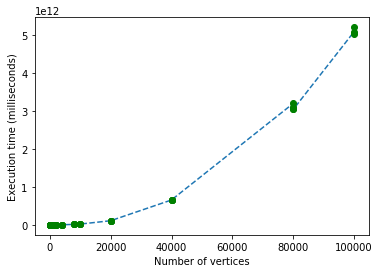

In [12]:
import matplotlib.pyplot as plt
results = sorted(results,key=lambda results: results[0])
print(results)
x_val = [x[0] for x in results]
y_val = [x[1] for x in results]

plt.plot(x_val,y_val,'--')
plt.plot(x_val,y_val,'og')
plt.ylabel("Execution time (milliseconds)")
plt.xlabel("Number of vertices")
plt.show()

In [8]:
plt.show()

# Parse input

In [5]:
def parse_input_file_kruskal(file_address):
    vertices = set()
    edges = [] 
    with open(glob.glob(file_address)[0]) as f:
        lines = f.readlines()
    num_V_E = [int(x) for x in lines[0].split()]
    lines = lines[1:]
    for line in lines:
        x = line.split()
        vertices.add(x[0])
        vertices.add(x[1])
        edges.append((x[0], x[1], int(x[2])))
    vertices = list(vertices)
    return vertices, edges, num_V_E

In [6]:
graphs_kruskal = []
graphs = ['input_random_01*', 'input_random_02*', 'input_random_06*']
for file in tqdm_notebook(graphs):
    vertices, edges, num_V_E = parse_input_file_kruskal(file) 
    graphs_kruskal.append((num_V_E, vertices, edges))

NameError: name 'tqdm_notebook' is not defined

In [4]:
class Graph:
    def __init__(self, V, E, num_V, num_E):
        self.V = V
        self.E = E
        self.num_V = num_V
        self.num_E = num_E

# Kruskal Efficient

In [2]:
class Kruskal_Efficient:
    
    def __init__(self, graph):
        self.graph = graph
        self.sets = {} # set of vertices
        self.MST = [] # Minimum Spanning Tree
        
    
    # make a set of vertices
    def make_sets(self):
        for v in self.graph.V:
            self.sets[v] = [v] 
    
    
    # append v to the list when it is not among the keys of the dictionary
    def append_v(self, items, v, u_index):
        for itm in list(items):
            ky, vl = itm[0], itm[1] # ky = key , vl = values
            if v in vl:
                res = self.sets[ky]
                self.sets.pop(ky)
                self.sets[u_index].extend(res[0:])
                break
        
    
    # join the subsets of vertices/edges
    def set_union(self, u, v, keys, items):
        # if u and v are two single sets
        if (u in keys):
            if (v in keys):
                res = self.sets[v] # store the values of list which contains v in the variale res
                self.sets.pop(v) # pop the list contained v from dictionary
                self.sets[u].extend(res[0:]) # append it to the list which contains u
            # if u a single set but v is in a set of vertices    
            else:
                self.append_v(items, v, u)

        # if u is not a single set
        else:
            for itm in list(items):
                u_ky, u_vl = itm[0], itm[1]
                if u in u_vl:
                    # if v is a signle set
                    if (v in keys):
                        res = self.sets[v] 
                        self.sets.pop(v)
                        self.sets[u_ky].extend(res[0:])
                    # if v is not in a single set as u    
                    else:
                        self.append_v(items, v, u_ky)
        
    
    # calculate the final weight of the MST
    def MSTweight_EK(self):
        sum = 0
        for (u ,v, w) in self.MST:
            sum = sum + w
        return sum

    
    # check if there is a cycle
    def check_cycle(self, u, v):
        cycle = False
        keys = self.sets.keys()
        items = self.sets.items()
        
        for item in list(items):
            key, value = item[0], item[1]
            # check if the set of (u, v) makes a loop
            if u in value:
                if v in value:
                    cycle = True
                # if not, add them to the set- append them to the self.sets()
                else:
                    self.set_union(u, v, keys, items)
        return cycle
    
    
    # make the MST tree
    def execute(self):
        lenv = len(self.graph.V) # number of vertices
        
        # sorting the edges based on the wight of the edges    
        E = sorted(self.graph.E, key = lambda m: m[2])
        self.make_sets() # make a set of vertices
        for e in E:
            if((len(self.MST)+1) <  self.graph.num_E):
                u, v, w = e
                if not self.check_cycle(u, v):
                    self.MST.append(e)
                    
        return self.MST


In [3]:
def get_time_kruskal(vertices, edges, num_V_E):
    graph = Graph(vertices, edges, num_V_E[0], num_V_E[1])
    algo = Kruskal_Efficient(graph)
    gc.disable()
    start_time = perf_counter_ns()
    result = algo.execute()
    end_time = perf_counter_ns()
    gc.enable()
    print("Running Time was: ", end_time-start_time)
    return (end_time-start_time)

In [4]:
results_k_efficient = []
for i in tqdm_notebook(range(len(graphs_kruskal))):
    print("|V| = ", graphs_kruskal[i][0][0], " |E| = ", graphs_kruskal[i][0][1])
    results_k_efficient.append((graphs_kruskal[i][0][0], get_time_kruskal(graphs_kruskal[i][1], graphs_kruskal[i][2], graphs_kruskal[i][0])))

NameError: name 'tqdm_notebook' is not defined

In [5]:
import matplotlib.pyplot as plt
results_k_efficient = sorted(results_k_efficient, key=lambda results: results[0])
print(results_k_efficient)
x_val = [x[0] for x in results_k_efficient]
y_val = [x[1] for x in results_k_efficient]

plt.plot(x_val,y_val,'--')
plt.plot(x_val,y_val,'og')
plt.ylabel("Execution time (milliseconds)")
plt.xlabel("Number of vertices")
plt.show()

NameError: name 'results_k_efficient' is not defined

# Kruskal Naive

In [5]:
class Kruskal_Naive:
    def __init__(self, graph):
        self.graph = graph
        self.MST = {} # adjacency list
        self.MST_edges = [] # edges
        
    def dfs_cycle(self, visited, G, v, parent):   
        visited.add(v)
        for neighbour in G[v]:
            if neighbour != parent and neighbour in visited:
                return True
            elif neighbour != parent:            
                return self.dfs_cycle(visited, G, neighbour, v)
        return False
    
    def check_cycle(self, edge):
        u, v, w = edge
        if (u in self.MST and v in self.MST[u]) or (v in self.MST and u in self.MST[v]):
            return True
        visited = set()
        # create a graph to check the edge addition
        MST_with_e = {}
        # add target edge
        MST_with_e[u] = [v]
        MST_with_e[v] = [u]
        # populate with MST edges
        for i in range(len(self.MST_edges)):
            a, b, w = self.MST_edges[i]
            if a not in MST_with_e:
                MST_with_e[a] = []
            if b not in MST_with_e:
                MST_with_e[b] = []
            MST_with_e[a].append(b)
            MST_with_e[b].append(a)
        
        return self.dfs_cycle(visited, MST_with_e, u, '-1')
    
    def execute(self):
        # sorting based on the weight of the edges    
        E = sorted(self.graph.E, key = lambda m: m[2])   
        for e in E:
#             print("e: ",e)
#             print("MST: ", self.MST)
            if not self.check_cycle(e):
                self.MST_edges.append(e)
                if e[0] not in self.MST:
                    self.MST[e[0]] = []
                self.MST[e[0]].append(e[1])
            print("MST", self.MST)
#                     print()
#                     print("--------------------------------------------------------------------------------------")
        return self.MST_edges

In [8]:
def get_time_kruskal(vertices, edges, num_V_E):
    print(vertices)
    print(edges)
    graph = Graph(vertices, edges, num_V_E[0], num_V_E[1])
    algo = Kruskal_Naive(graph)
    gc.disable()
    start_time = perf_counter_ns()
    full_edges  = algo.execute()
    end_time = perf_counter_ns()
    gc.enable()
    print("Running Time was: ", end_time-start_time)
    print(full_edges)
    print("Total weight: {}".format(sum([e[2] for e in full_edges])))
    return (end_time-start_time)

In [9]:
results_k_naive = []
for i in tqdm_notebook(range(len(graphs_kruskal[:10]))):
    print("|V| = ", graphs_kruskal[i][0][0], " |E| = ", graphs_kruskal[i][0][1])
    results_k_naive.append((graphs_kruskal[i][0][0], get_time_kruskal(graphs_kruskal[i][1], graphs_kruskal[i][2], graphs_kruskal[i][0])))

|V| =  10  |E| =  9
['9', '2', '10', '6', '4', '5', '7', '8', '1', '3']
[('1', '2', 4993), ('2', '3', 1392), ('3', '4', 8856), ('4', '5', -433), ('5', '6', 6590), ('6', '7', -7462), ('7', '8', 6658), ('8', '9', -976), ('9', '10', 9698)]
MST {'6': ['7']}
MST {'6': ['7'], '8': ['9']}
MST {'6': ['7'], '8': ['9'], '4': ['5']}
MST {'6': ['7'], '8': ['9'], '4': ['5'], '2': ['3']}
MST {'6': ['7'], '8': ['9'], '4': ['5'], '2': ['3'], '1': ['2']}
MST {'6': ['7'], '8': ['9'], '4': ['5'], '2': ['3'], '1': ['2'], '5': ['6']}
MST {'6': ['7'], '8': ['9'], '4': ['5'], '2': ['3'], '1': ['2'], '5': ['6'], '7': ['8']}
MST {'6': ['7'], '8': ['9'], '4': ['5'], '2': ['3'], '1': ['2'], '5': ['6'], '7': ['8'], '3': ['4']}
MST {'6': ['7'], '8': ['9'], '4': ['5'], '2': ['3'], '1': ['2'], '5': ['6'], '7': ['8'], '3': ['4'], '9': ['10']}
Running Time was:  550331
[('6', '7', -7462), ('8', '9', -976), ('4', '5', -433), ('2', '3', 1392), ('1', '2', 4993), ('5', '6', 6590), ('7', '8', 6658), ('3', '4', 8856), ('9',

In [13]:
plt.show()